In [1]:
#importing all required libraries 
import numpy as np #Need for numerical computation(if required)
import pandas as pd#Need for data manipulation,analysis and handling tabular data
import matplotlib.pyplot as plt #need for visualization

# Data set load

In [5]:
#loading the dataset from the directory 
df=pd.read_csv("../data set/01_Adidas US Sales uncleaned data set.csv") # i have uploaded the data set inside the data se sub folde  so according to that this is the directory

# Data Exploration

In [6]:
print(df.head(10))#it show the first 10 line of DataFrame

   sales_id       retailer  retailer_id invoice_date     region  \
0         1    Foot Locker      1185732   2021-11-06  Southeast   
1         2    Foot Locker      1185732   2020-03-14  Northeast   
2         3      West Gear      1128299   2021-01-19       West   
3         4        Walmart      1128299   2021-06-17  Southeast   
4         5  Sports Direct      1197831   2021-09-14      South   
5         6      West Gear      1197831   2021-07-06       West   
6         7      West Gear      1128299   2021-01-12       West   
7         8    Foot Locker      1185732   2020-01-21  Northeast   
8         9        Walmart      1197831   2020-08-17      South   
9        10      West Gear      1128299   2021-07-16      South   

            state           city                  product  price_per_unit  \
0  South Carolina     Charleston    Men's Street Footwear              50   
1        New York       New York            Men's Apparel              46   
2      California  San Francisc

In [7]:
print(df.columns) #it provides the column names

Index(['sales_id', 'retailer', 'retailer_id', 'invoice_date', 'region',
       'state', 'city', 'product', 'price_per_unit', 'units_sold',
       'total_sales', 'operating_profit', 'sales_method'],
      dtype='object')


In [8]:
print(df.info()) #it provide the not null column and data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_id          9637 non-null   int64 
 1   retailer          9637 non-null   object
 2   retailer_id       9637 non-null   int64 
 3   invoice_date      9637 non-null   object
 4   region            9637 non-null   object
 5   state             9637 non-null   object
 6   city              9637 non-null   object
 7   product           9637 non-null   object
 8   price_per_unit    9637 non-null   int64 
 9   units_sold        9637 non-null   int64 
 10  total_sales       9637 non-null   int64 
 11  operating_profit  9637 non-null   int64 
 12  sales_method      9637 non-null   object
dtypes: int64(6), object(7)
memory usage: 978.9+ KB
None


In [9]:
print(df.describe()) #it provides the statistical information of df

          sales_id   retailer_id  price_per_unit   units_sold   total_sales  \
count  9637.000000  9.637000e+03     9637.000000  9637.000000   9637.000000   
mean   4819.000000  1.173846e+06       45.218948   256.886064  12451.621355   
std    2782.106606  2.636304e+04       14.704520   214.097600  12708.094249   
min       1.000000  1.128299e+06        7.000000     6.000000    160.000000   
25%    2410.000000  1.185732e+06       35.000000   106.000000   4068.000000   
50%    4819.000000  1.185732e+06       45.000000   176.000000   7805.000000   
75%    7228.000000  1.185732e+06       55.000000   350.000000  15834.000000   
max    9637.000000  1.197831e+06      110.000000  1275.000000  82500.000000   

       operating_profit  
count       9637.000000  
mean        3440.706029  
std         5418.210200  
min            8.000000  
25%          192.000000  
50%          437.000000  
75%         5200.000000  
max        39000.000000  


In [10]:
print(df.isnull().sum()) #it will check is there any null values in the dataframe

sales_id            0
retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64


In [11]:
print(df[df.duplicated()])#checking is there any duplicate rows

Empty DataFrame
Columns: [sales_id, retailer, retailer_id, invoice_date, region, state, city, product, price_per_unit, units_sold, total_sales, operating_profit, sales_method]
Index: []


In [12]:
d=df.T.duplicated()#transposing the df to make esy to find the duplicate columns in next
print(df.columns[d])#checking is there any duplicate columns present in the data set

Index([], dtype='object')


In [13]:
#checking the unique values of columns region,product and sales_method
for i in ["region","product","sales_method"]:
    print(df[i].unique())

['Southeast' 'Northeast' 'West' 'South' 'Midwest']
["Men's Street Footwear" "Men's Apparel" "Men's Athletic Footwear"
 "Women's Apparel" "Women's Street Footwear" "Women's Athletic Footwear"]
['Online' 'Outlet' 'In-store']


# Data Cleaning

In [14]:
# Removing columns that are not required for analysis
df.drop(["sales_id", "retailer_id"], axis=1, inplace=True)

In [15]:
# Renaming columns for better understanding and readability
df.rename({"total_sales": "revenue", "operating_profit": "profit"}, axis=1, inplace=True)

In [16]:
# Adding a new column 'profit_margin' to represent profit as a percentage of revenue
df["profit_margin"] = round((df["profit"] / df["revenue"]) * 100, 2)

In [17]:
# Changing the data type of categorical columns to 'string' for consistency and memory optimization
for column in ["retailer", "region", "state", "city", "product", "sales_method"]:
    df[column] = df[column].astype("string")

In [18]:
# Converting the 'invoice_date' column to datetime format to ensure proper date handling
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

In [23]:
# Adding a new column to calculate profit per unit sold
df["profitper_unitsold"] = round(df["profit"] / df["units_sold"], 2)  # Calculate and round off to 2 decimals

In [24]:
# Verifying the data types and structure of the DataFrame after cleaning
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   retailer            9637 non-null   string        
 1   invoice_date        9637 non-null   datetime64[ns]
 2   region              9637 non-null   string        
 3   state               9637 non-null   string        
 4   city                9637 non-null   string        
 5   product             9637 non-null   string        
 6   price_per_unit      9637 non-null   int64         
 7   units_sold          9637 non-null   int64         
 8   revenue             9637 non-null   int64         
 9   profit              9637 non-null   int64         
 10  sales_method        9637 non-null   string        
 11  profit_margin       9637 non-null   float64       
 12  profitper_unitsold  9637 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), stri

# Exploratory Data Analysis(EDA)

In [20]:
# Exploring statistical values such as min, max, mean, etc., for selected numerical columns
print(df[["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]].describe())

            revenue        profit  profit_margin  price_per_unit   units_sold
count   9637.000000   9637.000000    9637.000000     9637.000000  9637.000000
mean   12451.621355   3440.706029      17.380722       45.218948   256.886064
std    12708.094249   5418.210200      16.301157       14.704520   214.097600
min      160.000000      8.000000       1.200000        7.000000     6.000000
25%     4068.000000    192.000000       4.500000       35.000000   106.000000
50%     7805.000000    437.000000       5.400000       45.000000   176.000000
75%    15834.000000   5200.000000      35.000000       55.000000   350.000000
max    82500.000000  39000.000000      65.000000      110.000000  1275.000000


In [21]:
# Detecting outliers using the Standard Deviation method
numerical_columns = ["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]  # Columns selected for outlier detection
for col in numerical_columns:
    mean = df[col].mean()  # Calculate the mean of the column
    std_dev = df[col].std()  # Calculate the standard deviation of the column
    lower_bound = mean - 3 * std_dev  # Define the lower threshold for outliers
    upper_bound = mean + 3 * std_dev  # Define the upper threshold for outliers
    outliers_below = df[df[col] < lower_bound]  # Identify outliers below the lower bound
    outliers_above = df[df[col] > upper_bound]  # Identify outliers above the upper bound
    
    # Print summary of outliers and statistical values
    print(f"Column: {col}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers Below: {len(outliers_below)}")
    print(f"Outliers Above: {len(outliers_above)}")

Column: revenue
Mean: 12451.621355193525
Standard Deviation: 12708.094249217836
Lower Bound: -25672.661392459984
Upper Bound: 50575.90410284704
Outliers Below: 0
Outliers Above: 206
Column: profit
Mean: 3440.7060288471516
Standard Deviation: 5418.210200278904
Lower Bound: -12813.924571989563
Upper Bound: 19695.336629683865
Outliers Below: 0
Outliers Above: 204
Column: profit_margin
Mean: 17.380722216457404
Standard Deviation: 16.301157414758887
Lower Bound: -31.522750027819253
Upper Bound: 66.28419446073406
Outliers Below: 0
Outliers Above: 0
Column: price_per_unit
Mean: 45.21894780533361
Standard Deviation: 14.70452026287657
Lower Bound: 1.1053870167039008
Upper Bound: 89.33250859396333
Outliers Below: 0
Outliers Above: 62
Column: units_sold
Mean: 256.8860641278406
Standard Deviation: 214.0975996140144
Lower Bound: -385.4067347142026
Upper Bound: 899.1788629698838
Outliers Below: 0
Outliers Above: 154


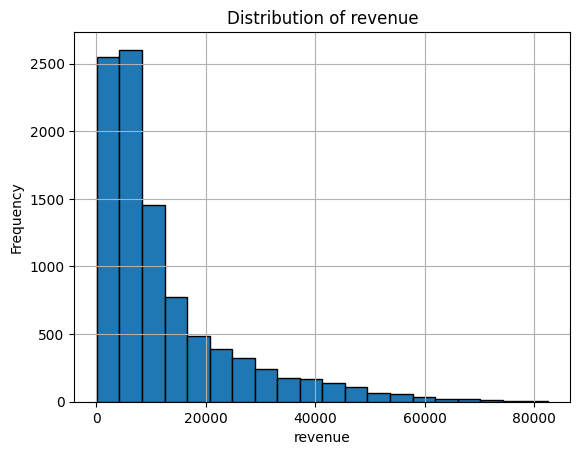

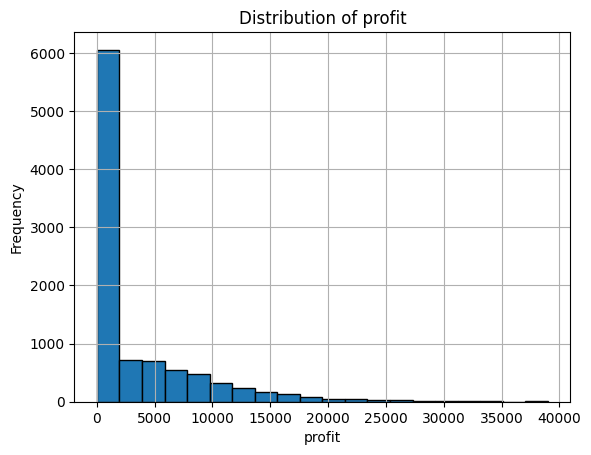

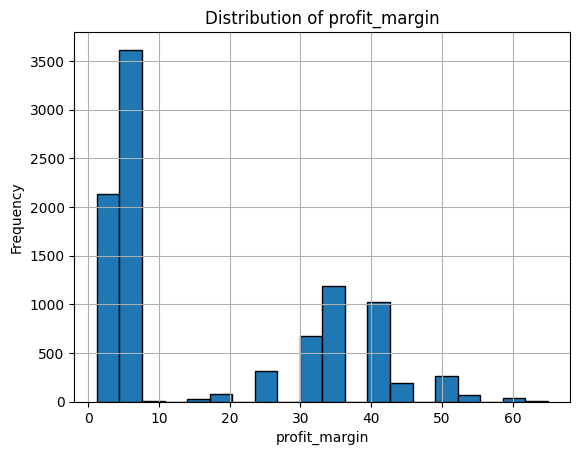

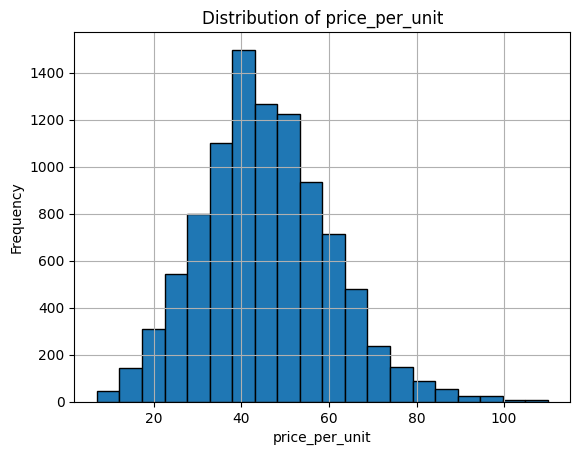

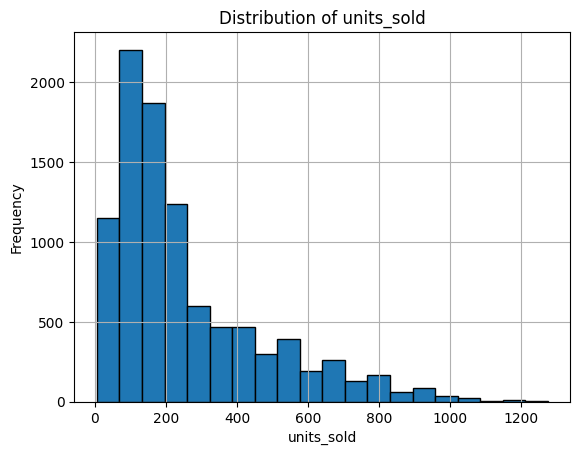

In [22]:
# Visualizing the distribution of selected numerical columns using histograms
columns_to_plot = ["revenue", "profit", "profit_margin", "price_per_unit", "units_sold"]
for i in columns_to_plot:
    plt.hist(df[i], bins=20, edgecolor="k")  # Plot histogram with bins and edge color
    plt.title(f"Distribution of {i}")  # Add a title
    plt.xlabel(i)  # Label the x-axis
    plt.ylabel("Frequency")  # Label the y-axis
    plt.grid(True)  # Add grid for better readability
    plt.show()

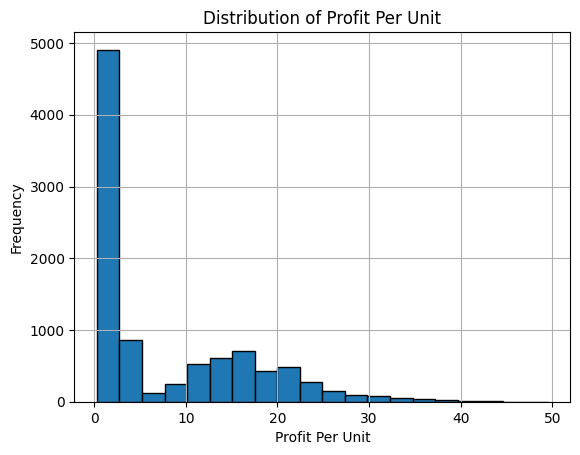

In [25]:
# Visualizing the distribution of profit per unit sold using a histogram
plt.hist(df["profitper_unitsold"], bins=20, edgecolor="k")
plt.title("Distribution of Profit Per Unit")
plt.xlabel("Profit Per Unit")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [26]:
# Identifying the product with the highest and lowest number of units sold
dtp = df.groupby("product").agg({"units_sold": "sum"}).reset_index()  # Summing units sold by product
most_sold_product = dtp.iloc[dtp.units_sold.idxmax()]  # Identify the product with the highest sales
least_sold_product = dtp.iloc[dtp.units_sold.idxmin()]  # Identify the product with the lowest sales
print("The most sold product is:")
print(most_sold_product)
print("The least sold product is:")
print(least_sold_product)

The most sold product is:
product       Men's Street Footwear
units_sold                   593320
Name: 2, dtype: object
The least sold product is:
product       Men's Apparel
units_sold           306133
Name: 0, dtype: object


In [27]:
# Determining revenue, profit, and product sales on a month-wise basis
df1 = df.copy()  # Create a copy of the dataframe for transformation
df1["invoice_date"] = df1["invoice_date"].dt.month_name()  # Convert invoice date to month name
df1["invoice_date"] = df1["invoice_date"].astype("string")  # Ensure the column is of string type
mnthdf = df1.groupby("invoice_date").agg({"revenue": "sum", "profit": "sum", "units_sold": "sum"}).reset_index()
mnthdf.rename(columns={"invoice_date": "month", "units_sold": "product_sold"}, inplace=True)  # Rename columns for clarity

In [28]:
# Defining the correct chronological order for months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
mnthdf["month"] = pd.Categorical(mnthdf["month"], categories=month_order, ordered=True)
mnthdf = mnthdf.sort_values("month").reset_index(drop=True)  # Sort months chronologically
print(mnthdf)

        month   revenue   profit  product_sold
0     January   9709017  2494553        227082
1    February   8263853  2139294        193959
2       March   7694984  2044006        190960
3       April   9691420  2755948        216426
4         May  10741720  2994665        214605
5        June   9783147  2664294        180564
6        July  12526794  3397257        218025
7      August  12258226  3432943        256846
8   September  10405584  3101007        228550
9     October   8538758  2507880        183001
10   November   9023440  2475583        174502
11   December  11359332  3150654        191091


In [29]:
# Identifying the month with the highest and lowest profit
high_profit_month = mnthdf[["month", "profit"]].iloc[[mnthdf.profit.idxmax()]]  # Month with highest profit
low_profit_month = mnthdf[["month", "profit"]].iloc[[mnthdf.profit.idxmin()]]  # Month with lowest profit
print("The highest profit month is:")
print(high_profit_month)
print("The lowest profit month is:")
print(low_profit_month)

The highest profit month is:
    month   profit
7  August  3432943
The lowest profit month is:
   month   profit
2  March  2044006


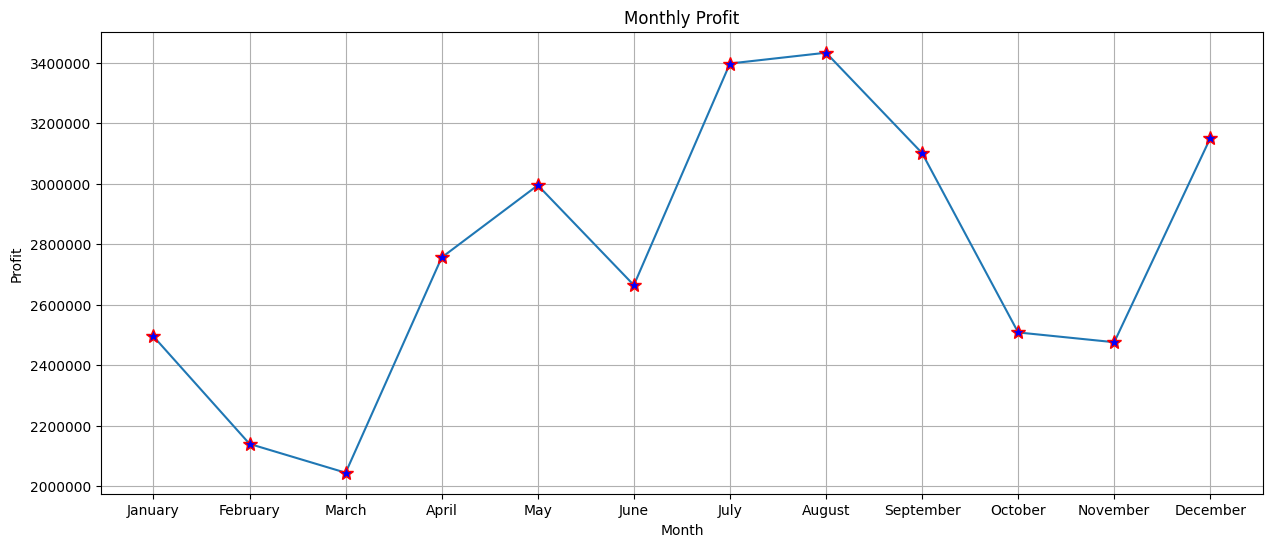

In [31]:
# Creating a line plot for monthly profit
plt.figure(figsize=(15,6)) # to increase the figure size
plt.plot(mnthdf["month"], mnthdf["profit"],"*-",mfc="b",mec="r",ms=10)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.grid(True)
plt.title("Monthly Profit")
plt.ticklabel_format(style="plain", axis="y")  # Avoid scientific notation
plt.show()

In [32]:
# Identifying the month with the highest and lowest product sales
high_sales_month = mnthdf[["month", "product_sold"]].iloc[[mnthdf.product_sold.idxmax()]]  # Month with highest sales
low_sales_month = mnthdf[["month", "product_sold"]].iloc[[mnthdf.product_sold.idxmin()]]  # Month with lowest sales
print("The highest product sales month is:")
print(high_sales_month)
print("The lowest product sales month is:")
print(low_sales_month)

The highest product sales month is:
    month  product_sold
7  August        256846
The lowest product sales month is:
       month  product_sold
10  November        174502


      region   revenue   profit
0    Midwest  16654434  5274020
1  Northeast  25078267  6802150
2      South  20544731  6093344
3  Southeast  21374436  6055601
4       West  36344407  8932969


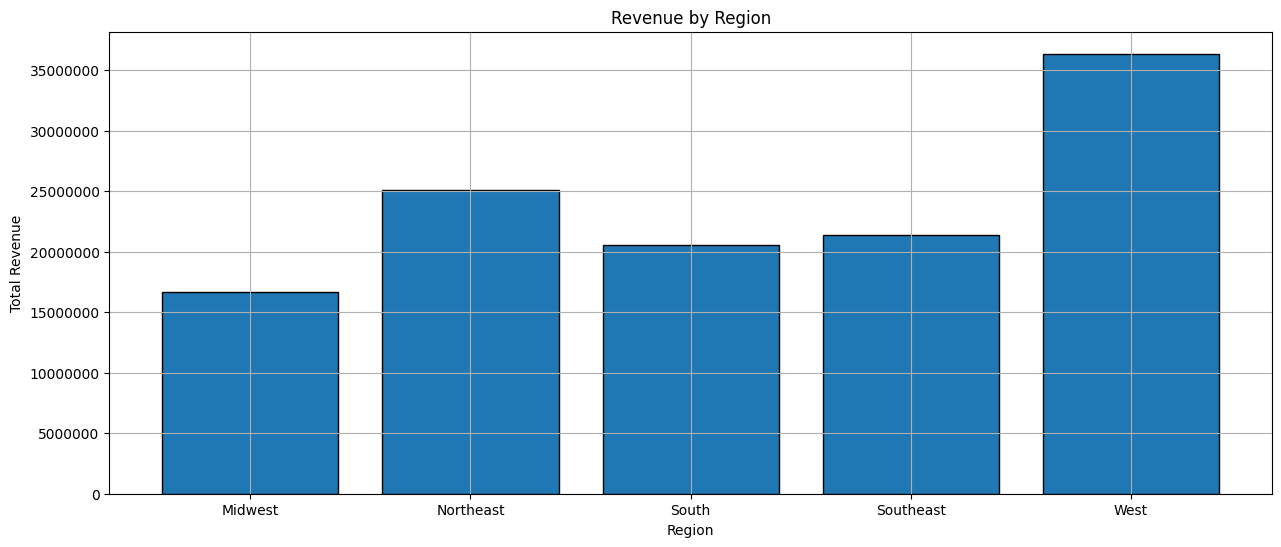

In [33]:
# Grouping data by region for regional analysis
tdf = df.groupby("region").agg({"revenue": "sum", "profit": "sum"}).reset_index()
print(tdf)

# Creating a bar chart to visualize revenue by region
plt.figure(figsize=(15,6)) # to increase the figure size
plt.bar(tdf["region"], tdf["revenue"], edgecolor="k")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.title("Revenue by Region")
plt.grid()
plt.ticklabel_format(style="plain", axis="y")  # Avoid scientific notation
plt.show()

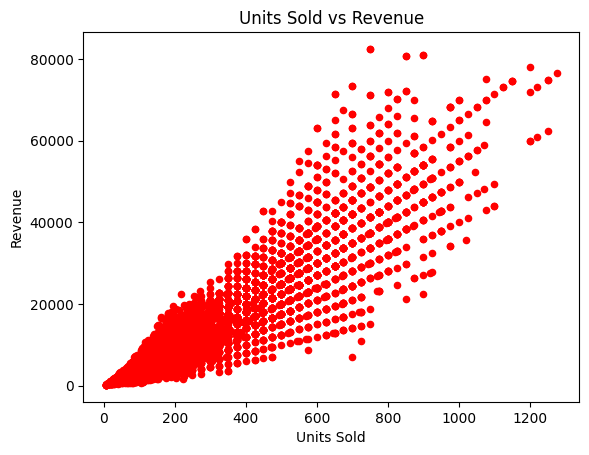

In [34]:
# Analyzing the correlation between units sold and revenue using a scatter plot
plt.scatter(df["units_sold"], df["revenue"], color="r", s=20)
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.title("Units Sold vs Revenue")
plt.show()

# Data Visualizations And Insights

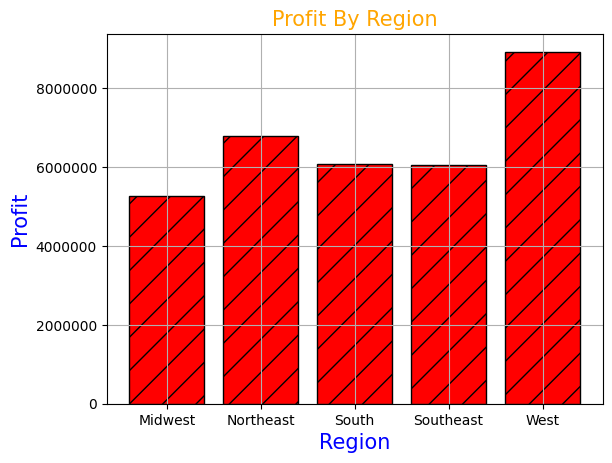

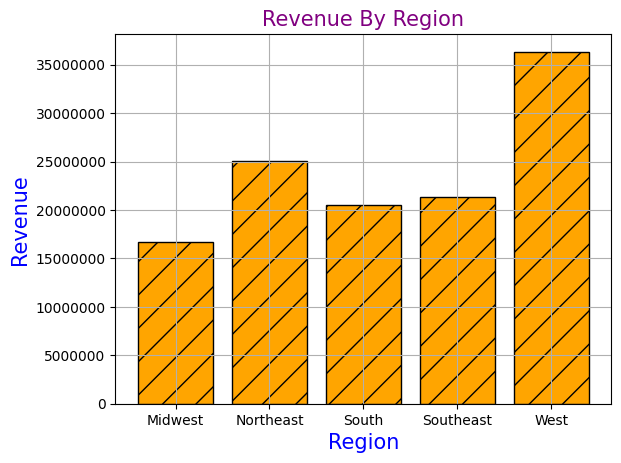

In [36]:
#Revenue and Profit analysis by region..
# Plotting profit by region using a bar chart.
# The tdf dataframe (grouped by region with aggregated profit and revenue) was created during the EDA step.
plt.bar(tdf["region"], tdf["profit"], color="r", edgecolor="k", hatch="/")
plt.xlabel("Region", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Profit By Region", color="orange", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

# Plotting revenue by region using a bar chart for analysis.
# This visualization refines the earlier revenue analysis done during EDA.
plt.bar(tdf["region"], tdf["revenue"], color="orange", edgecolor="k", hatch="/")
plt.xlabel("Region", color="b", size=15)  # Label for the x-axis
plt.ylabel("Revenue", color="b", size=15)  # Label for the y-axis
plt.title("Revenue By Region", color="purple", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

## Insight 1: Profit and Revenue Analysis by Region

### 1. Observation:
- The West Region has the highest profit and revenue with approximately **$9,000,000** and **$36,000,000**.
- The Midwest Region has the lowest profit and revenue with approximately **$5,000,000** and **$17,000,000**.
- The second highest profited and revenue region has slightly above **$7,000,000** and approximately**$25,000,000**.

### 2. Interpretations:
- The high profit and revenue in the **West Region** suggest **high demand, effective marketing strategies, or economic advantages**.
- The low profit and revenue in the **Midwest Region** indicate a **need for better marketing strategies or improvement in sales**.

### 3. Recommendations:
- **Maintain the growth path** in the West Region.
- **Implement new strategies**, focus on **sales discounts**, and **identify the cause of low profit** to boost profit and revenue in the Midwest Region.


                     product   revenue   profit
0              Men's Apparel  16484882  4456719
1    Men's Athletic Footwear  20532180  5168997
2      Men's Street Footwear  27680769  8280294
3            Women's Apparel  23814985  6856750
4  Women's Athletic Footwear  14311521  3896040
5    Women's Street Footwear  17171938  4499284


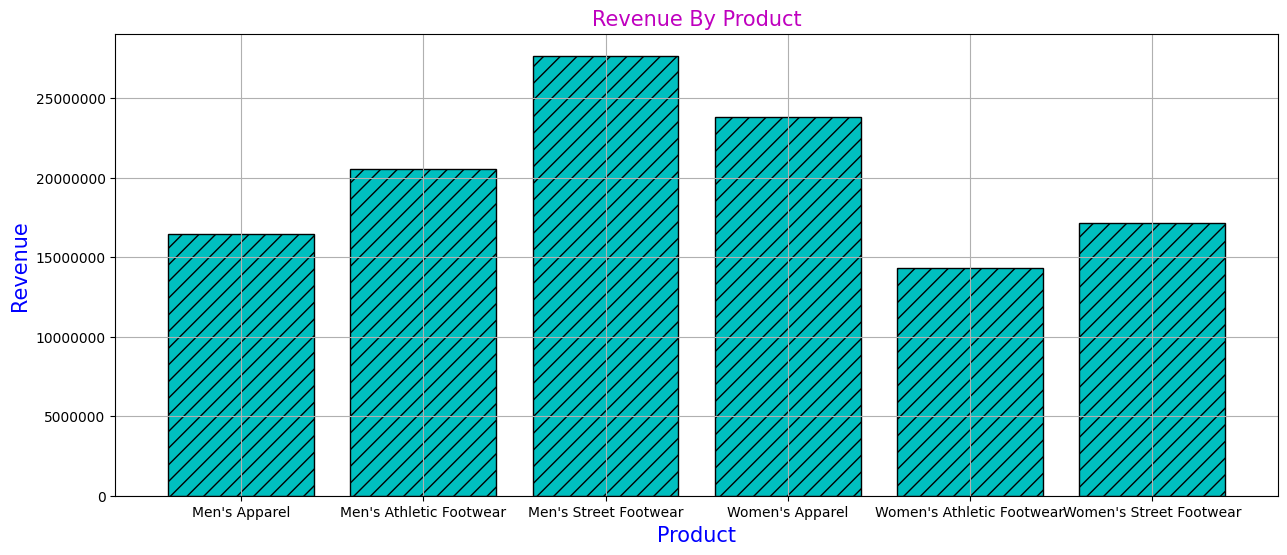

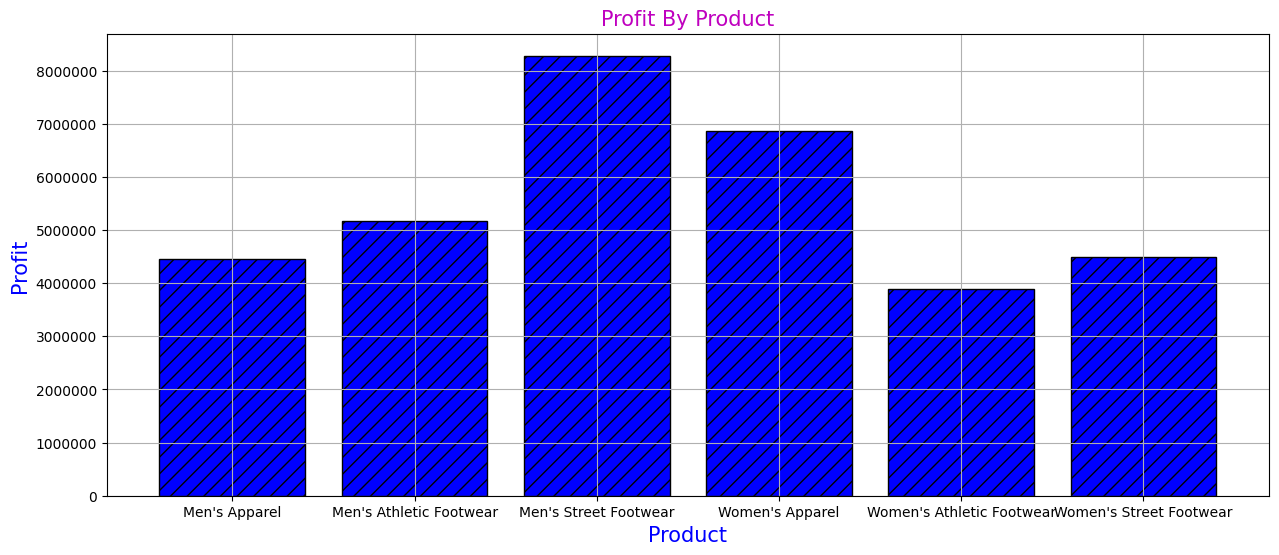

In [38]:
#Revenue and Profit Analysis by product
# Grouping data by product to calculate total revenue and profit for each product.
product_groupdf = df.groupby("product").agg({"revenue": "sum", "profit": "sum"}).reset_index()
print(product_groupdf)  # Displaying grouped data for reference

#ploting Revenue  by product  using bar chat visual for analysis
plt.figure(figsize=(15,6)) # to increase the figure size
plt.bar(product_groupdf["product"], product_groupdf["revenue"], color="c", edgecolor="k", hatch="//")
plt.xlabel("Product", color="b", size=15)  # Label for the x-axis
plt.ylabel("Revenue", color="b", size=15)  # Label for the y-axis
plt.title("Revenue By Product", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

#ploting profit  by product  using bar chat visual for analysis
plt.figure(figsize=(15,6)) # to increase the figure size
plt.bar(product_groupdf["product"], product_groupdf["profit"], color="b", edgecolor="k", hatch="//")
plt.xlabel("Product", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Profit By Product", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

## Insight 2: Revenue and Profit Analysis by Product

### 1. Observation:
- The highest revenue and profit product is **Men's Street Footwear**, with approximately **$28,000,000** and **$8,000,000**.
- The lowest revenue and profit product is **Women's Athletic Footwear**, with approximately **$14,500,000** and **$4,000,000**.

### 2. Interpretations:
- The high profit and revenue of **Men's Street Footwear** indicate that it is **very popular, well-received by customers, and meets quality expectations**.
- The low profit and revenue of **Women's Athletic Footwear** suggest that its **quality may be low or its design may not be meeting user satisfaction**.

### 3. Recommendations:
- **Continue selling and expanding distribution** of Men's Street Footwear to strengthen the company's financial position and profitability.
- **Focus on improving the quality and design** of Women's Athletic Footwear, and **gather user feedback** to enhance customer satisfaction.


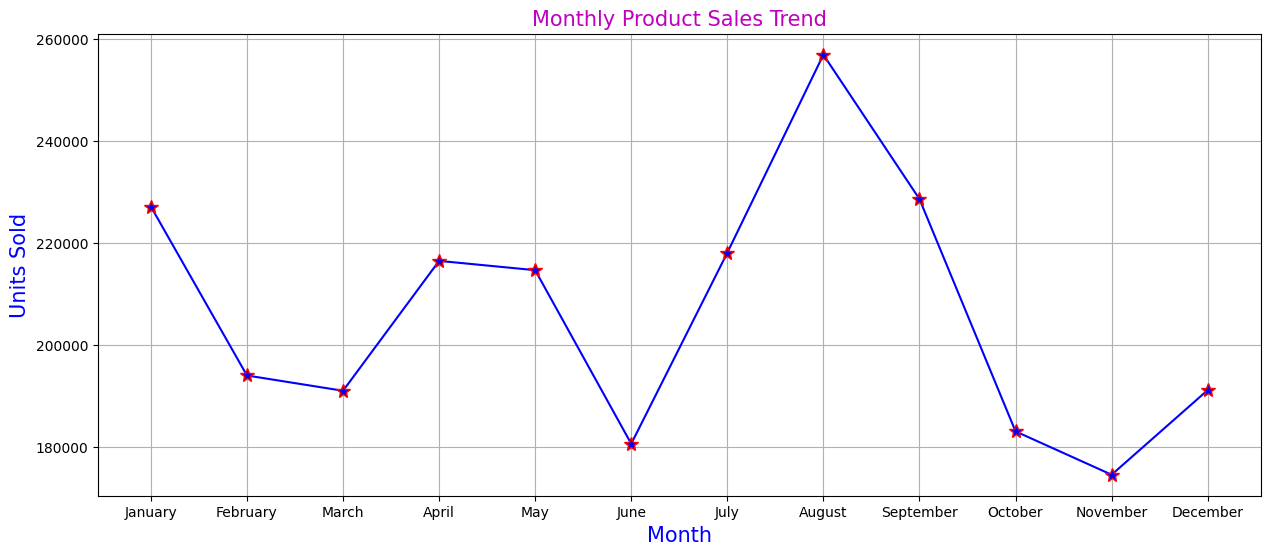

In [40]:
#Monthly sales analysis
# we have already creted a dataframe group by month which have product saled in EDA part 
# The mnthdf dataframe (grouped by month with aggregated product sold) was created during EDA.
#ploting a month by product sold lineplot for analysis
plt.figure(figsize=(15,6)) # to increase the figure size
plt.plot(mnthdf["month"], mnthdf["product_sold"], "*-", mfc="b", mec="r", ms=10, color="b")
plt.xlabel("Month", size=15, color="b")  # Label for the x-axis
plt.ylabel("Units Sold", size=15, color="b")  # Label for the y-axis
plt.title("Monthly Product Sales Trend", size=15, color="m")  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

## Insight 3: Monthly Product Sales Trend

### 1. Observation:
- **August** records the **highest sales**, exceeding **250,000 units**, while **June** has the **lowest sales**, dropping below **180,000 units**.
- A **steady rise** in sales is observed from **June to August**, followed by a **gradual decline** toward the end of the year.

### 2. Interpretations:
- The **peak sales in August** could be linked to **seasonal demand**, such as **summer shopping or back-to-school promotions**.
- The **sharp decline in June** may indicate **low consumer activity** or a **lack of marketing initiatives** during this period.
- The **recovery phase from June to August** suggests an **opportunity to identify and leverage demand trends**.

### 3. Recommendations:
- **Identify factors contributing to high sales in August** and apply those strategies to **low-performing months**.
- **Run special discounts or offers in June** to attract more customers and boost sales.
- **Plan strategies to maintain high sales after August**, such as **loyalty programs or festive deals**, to prevent a decline at the end of the year.


  sales_method  units_sold
0     In-store      689990
1       Online      939093
2       Outlet      846528


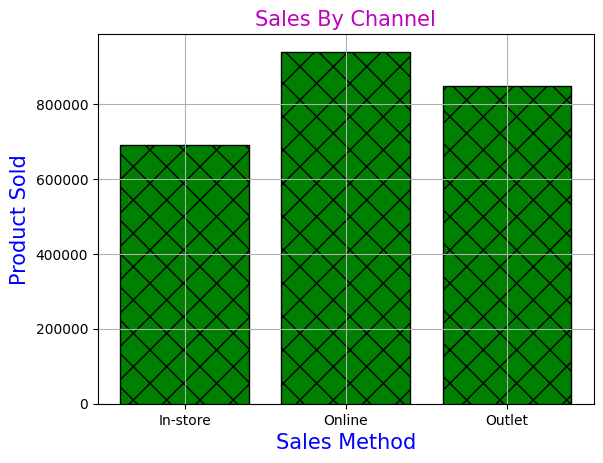

In [41]:
#Channel sales Analysis by barchat
# Grouping data by sales method to calculate total units sold through each channel.
channel_df = df.groupby("sales_method").agg({"units_sold": "sum"}).reset_index()
print(channel_df)  # Displaying grouped data for reference 

# Plotting sales by channel using a bar chart for analysis.
plt.bar(channel_df["sales_method"], channel_df["units_sold"], color="g", edgecolor="k", hatch="X")
plt.xlabel("Sales Method", color="b", size=15)  # Label for the x-axis
plt.ylabel("Product Sold", color="b", size=15)  # Label for the y-axis
plt.title("Sales By Channel", color="m", size=15)  # Title for the chart
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

## Insight 4: Sales by Channel (Sales Method) Analysis

### 1. Observation:
- **Online purchases** have the **highest sales**, reaching **939,093** units.
- **Outlet purchases** have the **second-highest sales**, with **846,528** units.
- The **lowest sales method** is **In-store sales**, with **only 689,990** units.

### 2. Interpretation:
- **Online purchases dominate**, possibly due to **convenience and time management benefits** for customers.
- **Outlet stores perform well**, but they **lag behind online sales**.
- **In-store sales are significantly lower**, indicating a **need for improvement to attract more customers**.

### 3. Recommendations:
- **Continue improving online sales** by enhancing **services, marketing strategies, and delivery efficiency** to boost company profits.
- **Expand outlet store presence** in **high-demand areas** to increase sales.
- **Improve in-store sales** by offering **special discounts and promotions** to attract more customers.


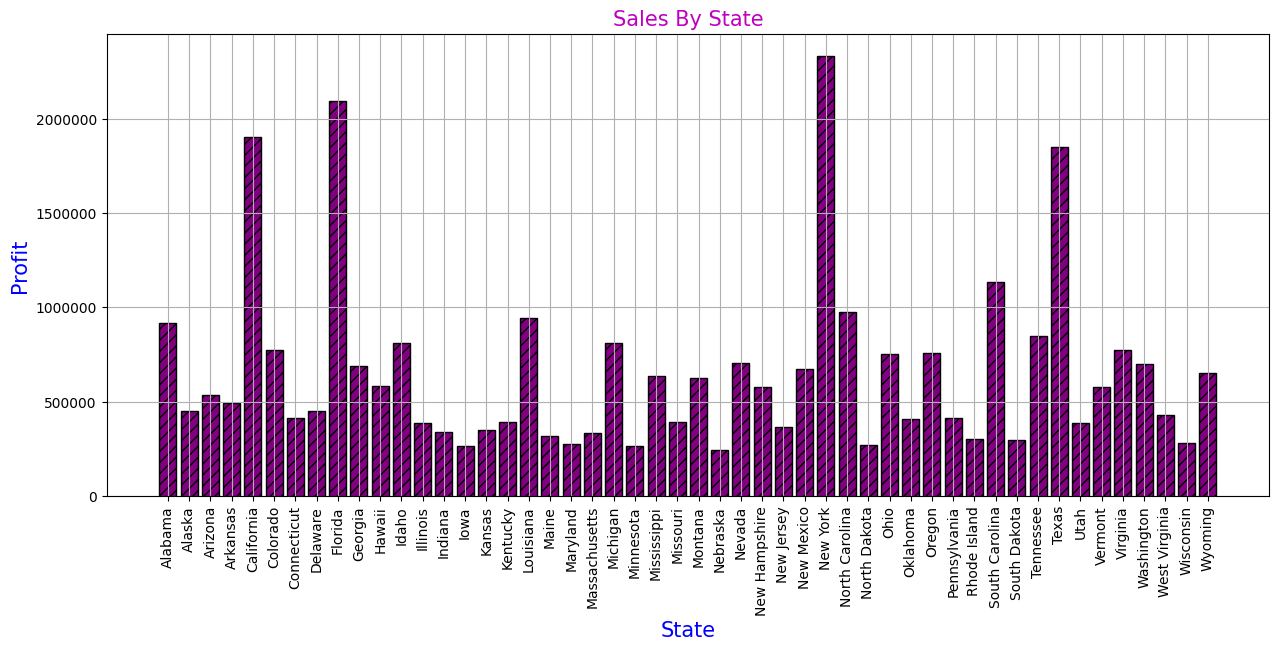

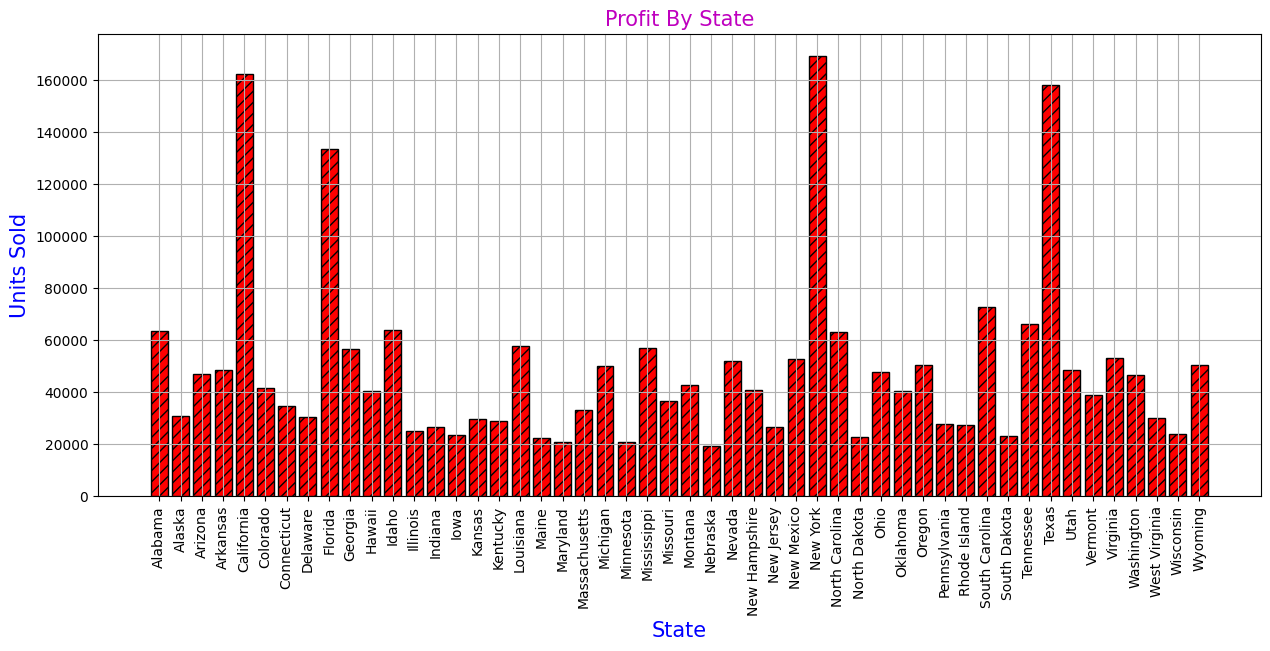

In [43]:
#Us state level profit analysis using barchat
# Grouping data by state to calculate total profit and units sold for each state.
state_df = df.groupby("state").agg({"profit": "sum", "units_sold": "sum"}).reset_index()
# Plotting state-wise profit using a bar chart for analysis.
plt.figure(figsize=(15,6)) # to increase the figure size
plt.bar(state_df["state"], state_df["profit"], color="purple", edgecolor="k", hatch="///")
plt.xlabel("State", color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit", color="b", size=15)  # Label for the y-axis
plt.title("Sales By State", color="m", size=15)  # Title for the chart
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

# Plotting state-wise units sold using a bar chart for analysis.
plt.figure(figsize=(15,6)) # to increase the figure size
plt.bar(state_df["state"], state_df["units_sold"], color="r", edgecolor="k", hatch="///")
plt.xlabel("State", color="b", size=15)  # Label for the x-axis
plt.ylabel("Units Sold", color="b", size=15)  # Label for the y-axis
plt.title("Profit By State", color="m", size=15)  # Title for the chart
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.grid()  # Displaying grid lines
plt.ticklabel_format(style="plain", axis="y")  # Formatting y-axis labels in plain numbers
plt.show()  # Display the plot

## Insight 5: Profit and Sales Analysis by State

### 1. Observation:
- **California, Texas, and New York** have the **highest sales and profits** compared to other states.
- **Nebraska, Maryland, and Minnesota** have **very low sales and profits**, indicating **underperformance**.
- A **clear pattern** shows that **states with higher units sold contribute significantly to overall profitability**.

### 2. Interpretation:
- **High sales in California, Texas, and New York** reflect **larger populations, better infrastructure, or strong demand** for the company's products.
- **Low sales and profits in Nebraska, Maryland, and Minnesota** may indicate **limited market size, weaker distribution channels, or lower customer awareness**.
- The data confirms a **direct link between units sold and profit**, showing that **higher sales volumes drive profitability**.

### 3. Recommendations:
- **Maintain strong performance** in **California, Texas, and New York** by continuing **targeted marketing efforts**.
- **Investigate the reasons for underperformance** in **Nebraska, Maryland, and Minnesota**, and consider launching **promotions, localized marketing campaigns, or improving product availability** in these states.
- **Develop a strategic approach** to **replicate successful sales models** from high-performing states in underperforming regions.


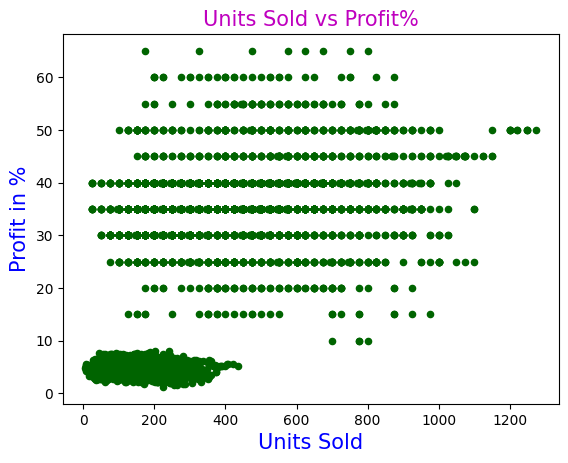

In [44]:
# Plotting correlation between units sold and profit margin using a scatter plot for analysis.
plt.scatter(df["units_sold"], df["profit_margin"], color="darkgreen", s=20)
plt.xlabel("Units Sold",color="b", size=15)  # Label for the x-axis
plt.ylabel("Profit in %",color="b", size=15)  # Label for the y-axis
plt.title("Units Sold vs Profit%", color="m", size=15)  # Title for the chart
plt.show()  # Display the plot

## Insight 6: Units Sold and Profit Percentage Analysis

### 1. Observations:
- **Most data points** are concentrated in the range of **0-200 units sold** with a **profit percentage of 0-10%**, indicating a **high frequency of low-profit scenarios**.
- A **few data points** with **units sold exceeding 400** show **varying profit percentages**, some reaching as high as **60%**, suggesting **occasional high-profit opportunities** in specific regions or time periods.
- There is **no consistent upward or downward trend** between **units sold and profit percentage**, highlighting a **weak or non-existent correlation**.

### 2. Interpretations:
- **Low unit sales** in most cases correlate with **low profit margins**, potentially due to **high fixed costs or discounts in smaller markets**.
- The **few instances of high profit percentage with high units sold** suggest these could represent **sales of premium or high-margin products in key cities or states**.
- The **scattered pattern** indicates that **other factors** (e.g., **product type, market demand, operational costs**) **drive profitability**, not just the number of units sold.

### 3. Recommendations:
- **Optimize cost structures**: For states or cities with **low unit sales and low profit percentages**, **reduce operational costs or revise pricing strategies** to improve profitability.
- **Focus on high-profit regions/products**: Identify the **regions, products, or time frames contributing to higher profit percentages** and replicate these strategies in other markets.
- **Analyze market trends**: Conduct **deeper analysis** to uncover underlying factors influencing profitability, such as **customer preferences, competition, or marketing effectiveness**.


## Reflection:
This project presented challenges such as **managing missing data, handling outliers, and ensuring correct datetime conversions**. By applying **systematic data cleaning methods and exploratory analysis**, these obstacles were overcome. **Visualizing data** was key to **understanding trends and forming actionable insights**.

## Conclusion:
Based on the analysis, actionable insights include:
1. **Focusing marketing efforts** on **regions with high revenue and profit**.
2. **Investigating underperforming products** and strategizing improvements.
3. **Optimizing inventory** based on **monthly sales trends** to prevent **overstocking or understocking**.
